In [1]:
# loading the preprcessed dataset
import pandas as pd

df = pd.read_csv("/Users/mv96/Desktop/dataset_tkb/test.csv")

print(df.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'page_no', 'top_left', 'bot_right',
       'grobid_text', 'pdf_alto_text', 'fonts', 'label', 'Normal',
       'Superscipt', 'Subscript', 'italics', 'bold', 'is_Proportional',
       'is_Serif', 'font_color_red', 'font_color_green', 'font_color_blue',
       'is_bold_manual', 'is_italic_manual', 'is_serif_manual',
       'is_math_manual', 'new_font_size', 'pdf_path'],
      dtype='object')


In [5]:
df = df.dropna()
df

,Unnamed: 0,Unnamed: 0.1,page_no,top_left,bot_right,grobid_text,pdf_alto_text,fonts,label,Normal,...,is_Serif,font_color_red,font_color_green,font_color_blue,is_bold_manual,is_italic_manual,is_serif_manual,is_math_manual,new_font_size,pdf_path
0,36,36,6.0,"(200.03563410896913, 1224.9484944798717)","(675, 1866)",Fact 6 Let G be a graph and let f (v) ≥ n/g(n)...,['Fact[~end_of_font~] 6[~end_of_font~] Let[~en...,['font0 font0 font0 font6 font0 font0 fo...,theorem,1.000000,...,0.0,0.0,0.0,0.0,0.627877,0.248082,0.627877,0.051151,0.249075,1812.02037/journal-factor.pdf
1,40,40,7.0,"(200.03563410896913, 711.6682345668228)","(675, 1866)",Fact 8 Let S be a subset of E(G).An f -factor ...,['Fact[~end_of_font~] 8[~end_of_font~] Let[~en...,['font0 font0 font0 font6 font0 font0 fo...,theorem,1.000000,...,0.0,0.0,0.0,0.0,0.857143,0.142857,0.857143,0.000000,0.249075,1812.02037/journal-factor.pdf
2,43,43,7.0,"(200.03563410896913, 1565.7368010805071)","(675, 1866)",Let A be an alternating circuit and S be a sub...,['Fact[~end_of_font~] 11[~end_of_font~] Let[~e...,['font0 font0 font0 font6 font0 font0 fo...,theorem,1.000000,...,0.0,0.0,0.0,0.0,0.866953,0.088816,0.866953,0.044231,0.249075,1812.02037/journal-factor.pdf
3,45,45,8.0,"(200.03563410896913, 255.4592491550138)","(675, 1866)",Fact 12 Let H be an f -factor of G and let Q b...,['Fact[~end_of_font~] 12[~end_of_font~] Let[~e...,['font0 font0 font0 font6 font0 font0 fo...,theorem,1.000000,...,0.0,0.0,0.0,0.0,0.772727,0.181818,0.772727,0.045455,0.249075,1812.02037/journal-factor.pdf
4,52,52,8.0,"(200.03563410896913, 1610.1379192173042)","(675, 1866)",Observation 14 Let G be an undirected graph an...,['Observation[~end_of_font~] 14[~end_of_font~]...,['font0 font0 font0 font6 font0 font0 fo...,theorem,1.000000,...,0.0,0.0,0.0,0.0,0.578947,0.210526,0.578947,0.105263,0.249075,1812.02037/journal-factor.pdf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388804,13,13,3.0,"(241.1818527361057, 480.18781204012924)","(840, 2132)","1. If w ∈ L then 2 3 ≤ g(w) f (w) ≤ 1, 2. If w...",['1.[~end_of_font~] If[~end_of_font~] w[~end_o...,['font1 font1 font11 font14 font11 font1 ...,theorem,0.753401,...,0.0,0.0,0.0,0.0,0.000000,0.278912,0.000000,0.187075,0.260075,1602.06073/main.pdf
388805,14,14,3.0,"(200.03563410896913, 657.097648821723)","(840, 2132)","Here, FP is the class of functions from bit st...","['Here,[~end_of_font~] FP[~end_of_font~] is[~e...",['font1 font1 font1 font1 font1 font1 fo...,theorem,0.855903,...,0.0,0.0,0.0,0.0,0.000000,0.080109,0.000000,0.023438,0.284519,1602.06073/main.pdf
388806,18,18,4.0,"(200.03563410896913, 795.191239021899)","(840, 2132)","Theorem 1.For any group oracle B = {B n }, the...",['Theorem[~end_of_font~] 1.[~end_of_font~] For...,['font16 font16 font2 font2 font2 font2 ...,theorem,0.907005,...,0.0,0.0,0.0,0.0,0.055556,0.746377,0.055556,0.105072,0.289610,1602.06073/main.pdf
388807,19,19,4.0,"(200.03563410896913, 906.0551072107728)","(840, 2132)","H ≡ g 1 , ..., g k in time polynomial in n+log...",['H[~end_of_font~] ≡[~end_of_font~]g[~end_of_f...,['font11 font14 font11 font12 font11 font11 ...,theorem,0.710417,...,0.0,0.0,0.0,0.0,0.000000,0.420833,0.000000,0.229167,0.270025,1602.06073/main.pdf


In [7]:
cols_list = list(filter(lambda x: not x.startswith("Unnamed"), list(df.columns)))
font_vectors = df[cols_list].iloc[:, 7:-1]
labels = df["label"]

In [9]:
font_vectors.describe()

,Normal,Superscipt,Subscript,italics,bold,is_Proportional,is_Serif,font_color_red,font_color_green,font_color_blue,is_bold_manual,is_italic_manual,is_serif_manual,is_math_manual,new_font_size
count,385368.000000,385368.000000,385368.000000,385368.000000,385368.000000,385368.000000,385368.000000,385368.000000,385368.000000,385368.000000,385368.000000,385368.000000,385368.000000,385368.000000,385368.000000
mean,0.904917,0.027649,0.049258,0.017161,0.002694,0.970731,0.000288,0.000460,0.000362,0.000444,0.178749,0.213263,0.269013,0.070107,0.259792
std,0.129550,0.053174,0.070020,0.087247,0.027810,0.155894,0.014648,0.009713,0.007648,0.009674,0.331667,0.235511,0.383141,0.103025,0.021831
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.862156,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014493,0.000000,0.000000,0.247775
50%,0.946682,0.000000,0.018223,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140423,0.009524,0.031229,0.264710
75%,1.000000,0.035088,0.077660,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.104167,0.316537,0.632343,0.100000,0.272725
max,1.000000,1.000000,0.854342,1.000000,1.000000,1.000000,1.000000,0.997099,0.780882,1.000000,1.000000,1.000000,1.000000,1.000000,0.619675


In [10]:
font_vectors.describe()

,Normal,Superscipt,Subscript,italics,bold,is_Proportional,is_Serif,font_color_red,font_color_green,font_color_blue,is_bold_manual,is_italic_manual,is_serif_manual,is_math_manual,new_font_size
count,385368.000000,385368.000000,385368.000000,385368.000000,385368.000000,385368.000000,385368.000000,385368.000000,385368.000000,385368.000000,385368.000000,385368.000000,385368.000000,385368.000000,385368.000000
mean,0.904917,0.027649,0.049258,0.017161,0.002694,0.970731,0.000288,0.000460,0.000362,0.000444,0.178749,0.213263,0.269013,0.070107,0.259792
std,0.129550,0.053174,0.070020,0.087247,0.027810,0.155894,0.014648,0.009713,0.007648,0.009674,0.331667,0.235511,0.383141,0.103025,0.021831
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.862156,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014493,0.000000,0.000000,0.247775
50%,0.946682,0.000000,0.018223,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140423,0.009524,0.031229,0.264710
75%,1.000000,0.035088,0.077660,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.104167,0.316537,0.632343,0.100000,0.272725
max,1.000000,1.000000,0.854342,1.000000,1.000000,1.000000,1.000000,0.997099,0.780882,1.000000,1.000000,1.000000,1.000000,1.000000,0.619675


In [11]:
combined = pd.concat([font_vectors, labels], axis=1)
combined.shape

(385368, 16)

In [12]:
# removing nan values
combined = combined.dropna()
combined.shape

(385368, 16)

In [13]:
combined["label"].value_counts()

basic      194895
proof      123010
theorem     67463
Name: label, dtype: int64

<AxesSubplot:>

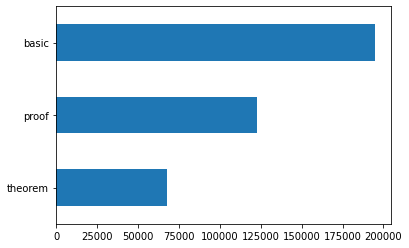

In [14]:
# class imbalance in the data
combined["label"].value_counts().sort_values().plot(kind="barh")

In [15]:
X = combined.iloc[:, :-1]
y = combined["label"]

# divide the dataset into test and train portions
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=42, stratify=y
)

print(X.shape, y.shape)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(385368, 15) (385368,)
(346831, 15) (38537, 15) (346831,) (38537,)


In [16]:
# still has imbalance
y_train.value_counts()

basic      175405
proof      110709
theorem     60717
Name: label, dtype: int64

In [17]:
y_test.value_counts()

basic      19490
proof      12301
theorem     6746
Name: label, dtype: int64

# what type of train test split to use

1. should you use the the pdf wise sampled data because many classifiers that work on distances will work better as 
    there would all the paragraphs of the pdf given above but one drawback many classifiers will get impacted by
    class imbalance
2. should you use splitting based on the amount of genereted sequences

# Investigating sampling techniques

## The question of which version to train the models on ? (undersampled, Oversampled, or something hybrid)

* undersampling - The models trained are immune to class imbalances however we lose alot of data with this approach also faster to train since we have less data with us

* oversampling - The models trained are also immune to class imbalances however are prone to overfitting and generally takes more time to train the classifiers

* without any under/oversampling taken into account

to investigate on which process yeilds better parameter we train 3 classifiers 

1. KNN - that involves distances measure (not impacted by class imbalances)
2. Naive bayes - a probablistic model that gets impacted by class imbalances
3. Logistic regression - when there is a huge class imbalance

we calculate a weighted f1 score of all class over 10 fold cross validation then mean across the three classifiers built

**evaluation is based upont the default parameters to reduce the runtime**

In [18]:
# before under sampling shape
y.value_counts()
print(y.value_counts())

basic      194895
proof      123010
theorem     67463
Name: label, dtype: int64


In [20]:
from imblearn.under_sampling import RandomUnderSampler

for i in range(len(y_train.value_counts()) - 1):
    undersample = RandomUnderSampler(sampling_strategy="majority", random_state=1)
    try:
        X_under, y_under = undersample.fit_resample(X_under, y_under)
    except:
        X_under, y_under = undersample.fit_resample(X_train, y_train)

In [21]:
y_under.value_counts()

basic      60717
proof      60717
theorem    60717
Name: label, dtype: int64

In [22]:
print(X_under.shape, y_under.shape)
print(X_train.shape, y_train.shape)

(182151, 15) (182151,)
(346831, 15) (346831,)


# undersampled data

In [23]:
# for class imbalance
from sklearn.model_selection import cross_val_score

# my classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
import numpy as np
from tqdm import tqdm

clfs = [
    KNeighborsClassifier(n_jobs=4),
    MultinomialNB(),
    LogisticRegression(random_state=0, n_jobs=4),
]

from sklearn import metrics


# f1=f1_score(y_under, y_pred, average='weighted')
# acc=accuracy_score(y_under, y_pred)

scoring = ["accuracy", "f1_weighted", "neg_log_loss"]
accs = []
f1s = []
"""
for clf in tqdm(clfs):
    scores=cross_validate(clf, X_under, y_under, scoring=scoring,n_jobs=4,cv=10)
    mean_acc=np.mean(scores["test_accuracy"])
    mean_f1=np.mean(scores["test_f1_weighted"])
    mean_loss=np.mean(scores["test_neg_log_loss"])
    accs.append(mean_acc)
    f1s.append(mean_f1)
    
print(accs,f1s)
"""
# evaluation on test data
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

test_scores_1 = []
for clf in tqdm(clfs):
    clf.fit(X_under, y_under)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    test_scores_1.append([clf, f1, acc])
    print(clf, f1, acc)

  0%|                                                     | 0/3 [00:00<?, ?it/s]/Users/mv96/miniforge3/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
 33%|███████████████                              | 1/3 [00:03<00:06,  3.31s/it]

KNeighborsClassifier(n_jobs=4) 0.5489295255903758 0.5483042271064172


 67%|██████████████████████████████               | 2/3 [00:03<00:01,  1.73s/it]

MultinomialNB() 0.5331628523345446 0.5290240548044737


/Users/mv96/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
100%|█████████████████████████████████████████████| 3/3 [00:07<00:00,  2.64s/it]

LogisticRegression(n_jobs=4, random_state=0) 0.560723502064742 0.5627059708851234


# without any under/oversampling has class imbalances

In [25]:
# for class imbalance
from sklearn.model_selection import cross_val_score

# my classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from tqdm import tqdm

clfs = [
    KNeighborsClassifier(n_jobs=4),
    MultinomialNB(),
    LogisticRegression(random_state=0, n_jobs=4),
]

from sklearn import metrics
from sklearn.metrics import f1_score

# f1=f1_score(y_under, y_pred, average='weighted')
# acc=accuracy_score(y_under, y_pred)

scoring = ["accuracy", "f1_weighted"]
accs = []
f1s = []

"""
for clf in tqdm(clfs):
    scores=cross_validate(clf, X_train, y_train, scoring=scoring,n_jobs=4,cv=10)
    mean_acc=np.mean(scores["test_accuracy"])
    mean_f1=np.mean(scores["test_f1_weighted"])
    accs.append(mean_acc)
    f1s.append(mean_f1)
    
print(accs,f1s)
"""

# evaluation on test data
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

test_scores_2 = []
for clf in tqdm(clfs):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    test_scores_2.append([clf, f1, acc])
    print(clf, f1, acc)

  0%|                                                     | 0/3 [00:00<?, ?it/s]/Users/mv96/miniforge3/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
 33%|███████████████                              | 1/3 [00:06<00:13,  6.84s/it]

KNeighborsClassifier(n_jobs=4) 0.5677481547358162 0.5759140566209098


 67%|██████████████████████████████               | 2/3 [00:07<00:03,  3.49s/it]

MultinomialNB() 0.35257257728677976 0.5059034174948751


/Users/mv96/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
100%|█████████████████████████████████████████████| 3/3 [00:14<00:00,  4.94s/it]

LogisticRegression(n_jobs=4, random_state=0) 0.5481174305161812 0.5832057503178764


# with oversampling 

In [26]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy="not majority")

X_over, y_over = oversample.fit_resample(X_train, y_train)

# for class imbalance
from sklearn.model_selection import cross_val_score

# my classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import ComplementNB
import numpy as np
from tqdm import tqdm

clfs = [
    KNeighborsClassifier(n_jobs=4),
    MultinomialNB(),
    LogisticRegression(random_state=0, n_jobs=4),
]

from sklearn import metrics
from sklearn.metrics import f1_score

# f1=f1_score(y_under, y_pred, average='weighted')
# acc=accuracy_score(y_under, y_pred)

scoring = ["accuracy", "f1_weighted"]
accs = []
f1s = []

"""
for clf in tqdm(clfs):
    scores=cross_validate(clf, X_over, y_over, scoring=scoring,n_jobs=4,cv=10)
    mean_acc=np.mean(scores["test_accuracy"])
    mean_f1=np.mean(scores["test_f1_weighted"])
    accs.append(mean_acc)
    f1s.append(mean_f1)
    
print(accs,f1s)
"""

# evaluation on test data
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

test_scores_3 = []
for clf in tqdm(clfs):
    clf.fit(X_over, y_over)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    test_scores_3.append([clf, f1, acc])
    print(clf, f1, acc)

  0%|                                                     | 0/3 [00:00<?, ?it/s]/Users/mv96/miniforge3/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
 33%|███████████████                              | 1/3 [00:06<00:13,  6.82s/it]

KNeighborsClassifier(n_jobs=4) 0.5450861723957208 0.542465682331266


 67%|██████████████████████████████               | 2/3 [00:08<00:03,  3.81s/it]

MultinomialNB() 0.5324885050604752 0.5282455821677868


/Users/mv96/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
100%|█████████████████████████████████████████████| 3/3 [00:18<00:00,  6.19s/it]

LogisticRegression(n_jobs=4, random_state=0) 0.5620922718505574 0.5638217816643745


In [28]:
# summarizing the techniques
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = [
    "Splitting Strategy",
    "Data version",
    "algorithm",
    "test_acc",
    "test_f1",
]
splitting_strategy = "Random"
test = [test_scores_1, test_scores_2, test_scores_3]
for name, test_ in zip(["random under", "As is", "random over"], test):
    for element in test_:
        clf = element[0]
        test_f1 = float("{0:.4f}".format(element[1]))
        test_acc = float("{0:.4f}".format(element[2]))
        x.add_row([splitting_strategy, name, clf, test_f1, test_acc])

print(x)

+--------------------+--------------+----------------------------------------------+----------+---------+
| Splitting Strategy | Data version |                  algorithm                   | test_acc | test_f1 |
+--------------------+--------------+----------------------------------------------+----------+---------+
|       Random       | random under |        KNeighborsClassifier(n_jobs=4)        |  0.5489  |  0.5483 |
|       Random       | random under |               MultinomialNB()                |  0.5332  |  0.529  |
|       Random       | random under | LogisticRegression(n_jobs=4, random_state=0) |  0.5607  |  0.5627 |
|       Random       |    As is     |        KNeighborsClassifier(n_jobs=4)        |  0.5677  |  0.5759 |
|       Random       |    As is     |               MultinomialNB()                |  0.3526  |  0.5059 |
|       Random       |    As is     | LogisticRegression(n_jobs=4, random_state=0) |  0.5481  |  0.5832 |
|       Random       | random over  |        K

# another type of train test split technique (sample 90% of all pdf contents)

In [29]:
# divide the dataset into test and train portions
import pandas as pd

df = pd.read_csv("/Users/mv96/Desktop/dataset_tkb/test.csv")

print(df.columns)

cols_list = list(filter(lambda x: not x.startswith("Unnamed"), list(df.columns)))

font_vectors = df[cols_list].iloc[:, 7:-1]
labels = df[["label", "pdf_path"]]
combined = pd.concat([font_vectors, labels], axis=1)
df = combined.dropna()

Index(['Unnamed: 0', 'Unnamed: 0.1', 'page_no', 'top_left', 'bot_right',
       'grobid_text', 'pdf_alto_text', 'fonts', 'label', 'Normal',
       'Superscipt', 'Subscript', 'italics', 'bold', 'is_Proportional',
       'is_Serif', 'font_color_red', 'font_color_green', 'font_color_blue',
       'is_bold_manual', 'is_italic_manual', 'is_serif_manual',
       'is_math_manual', 'new_font_size', 'pdf_path'],
      dtype='object')


In [30]:
# rerunning this block will change the outputs several time
from random import sample
import math

all_pdfs = list(df["pdf_path"].unique())
print(len(all_pdfs))
train_pdfs = sample(
    list(df["pdf_path"].unique()),
    math.floor(len(df["pdf_path"].unique()) * 0.90),
)
print(len(train_pdfs))
test_pdfs = [pdf for pdf in all_pdfs if pdf not in train_pdfs]
print(len(test_pdfs))

training_data = df[
    df["pdf_path"].isin(train_pdfs)
]  # basically all the values that have training pdfs
test_data = df[
    df["pdf_path"].isin(test_pdfs)
]  # basically all the values that have training pdfs

# filter out everything that startswith unnamed

y_train = training_data["label"]
X_train = training_data.iloc[:, :-2]

y_test = test_data["label"]
X_test = test_data.iloc[:, :-2]


print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

2610
2349
261
(352106, 15) (352106,) (36413, 15) (36413,)


<AxesSubplot:>

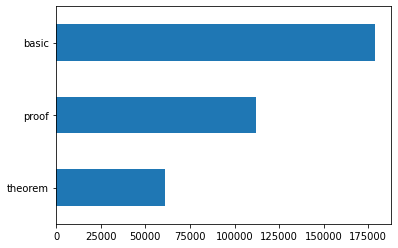

In [31]:
training_data["label"].value_counts().sort_values().plot(kind="barh")

# without under sample or over sample

In [32]:
# for class imbalance
from sklearn.model_selection import cross_val_score

# my classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from tqdm import tqdm

clfs = [
    KNeighborsClassifier(n_jobs=4),
    MultinomialNB(),
    LogisticRegression(random_state=0, n_jobs=4),
]

from sklearn import metrics
from sklearn.metrics import f1_score

# f1=f1_score(y_under, y_pred, average='weighted')
# acc=accuracy_score(y_under, y_pred)

scoring = ["accuracy", "f1_weighted"]
accs = []
f1s = []

"""
for clf in tqdm(clfs):
    scores=cross_validate(clf, X_train, y_train, scoring=scoring,n_jobs=4,cv=10)
    mean_acc=np.mean(scores["test_accuracy"])
    mean_f1=np.mean(scores["test_f1_weighted"])
    accs.append(mean_acc)
    f1s.append(mean_f1)

print(accs,f1s)
"""

# evaluation on test data
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

for clf in tqdm(clfs):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    print(clf, f1, acc)

  0%|                                                     | 0/3 [00:00<?, ?it/s]/Users/mv96/miniforge3/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
 33%|███████████████                              | 1/3 [00:04<00:09,  4.64s/it]

KNeighborsClassifier(n_jobs=4) 0.5588011705841246 0.5683409771235548


 67%|██████████████████████████████               | 2/3 [00:05<00:02,  2.49s/it]

MultinomialNB() 0.34128796501932274 0.49847581907560484


/Users/mv96/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
100%|█████████████████████████████████████████████| 3/3 [00:11<00:00,  3.91s/it]

LogisticRegression(n_jobs=4, random_state=0) 0.5438562837196489 0.5811660670639607


# undersampling

In [33]:
try:
    del X_under
    del y_under
except:
    pass

from imblearn.under_sampling import RandomUnderSampler

for i in range(len(y_train.value_counts()) - 1):
    undersample = RandomUnderSampler(sampling_strategy="majority", random_state=1)
    try:
        X_under, y_under = undersample.fit_resample(X_under, y_under)
    except:
        X_under, y_under = undersample.fit_resample(X_train, y_train)

In [34]:
# for class imbalance
from sklearn.model_selection import cross_val_score

# my classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
import numpy as np
from tqdm import tqdm

clfs = [
    KNeighborsClassifier(n_jobs=4),
    MultinomialNB(),
    LogisticRegression(random_state=0, n_jobs=4),
]

from sklearn import metrics
from sklearn.metrics import f1_score

# f1=f1_score(y_under, y_pred, average='weighted')
# acc=accuracy_score(y_under, y_pred)

scoring = ["accuracy", "f1_weighted"]
accs = []
f1s = []

"""
for clf in tqdm(clfs):
    scores=cross_validate(clf, X_under, y_under, scoring=scoring,n_jobs=4,cv=10)
    mean_acc=np.mean(scores["test_accuracy"])
    mean_f1=np.mean(scores["test_f1_weighted"])
    accs.append(mean_acc)
    f1s.append(mean_f1)
    
print(accs,f1s)
"""

# evaluation on test data
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

for clf in tqdm(clfs):
    clf.fit(X_under, y_under)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    print(clf, f1, acc)

  0%|                                                     | 0/3 [00:00<?, ?it/s]/Users/mv96/miniforge3/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
 33%|███████████████                              | 1/3 [00:03<00:06,  3.03s/it]

KNeighborsClassifier(n_jobs=4) 0.5578192780371037 0.5576579792931096


 67%|██████████████████████████████               | 2/3 [00:03<00:01,  1.58s/it]

MultinomialNB() 0.5385556982058242 0.5342872051190509


/Users/mv96/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
100%|█████████████████████████████████████████████| 3/3 [00:07<00:00,  2.36s/it]

LogisticRegression(n_jobs=4, random_state=0) 0.5665783996842056 0.5694669486172521


In [35]:
print(X_train.shape, y_train.shape)
print(X_under.shape, y_under.shape)

(352106, 15) (352106,)
(183867, 15) (183867,)


# oversampling 

In [36]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy="not majority")

X_over, y_over = oversample.fit_resample(X_train, y_train)

# for class imbalance
from sklearn.model_selection import cross_val_score

# my classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import ComplementNB
import numpy as np
from tqdm import tqdm

clfs = [
    KNeighborsClassifier(n_jobs=4),
    MultinomialNB(),
    LogisticRegression(random_state=0, n_jobs=4),
]

from sklearn import metrics
from sklearn.metrics import f1_score

# f1=f1_score(y_under, y_pred, average='weighted')
# acc=accuracy_score(y_under, y_pred)

scoring = ["accuracy", "f1_weighted"]
accs = []
f1s = []

"""
for clf in tqdm(clfs):
    scores=cross_validate(clf, X_over, y_over, scoring=scoring,n_jobs=4,cv=10)
    mean_acc=np.mean(scores["test_accuracy"])
    mean_f1=np.mean(scores["test_f1_weighted"])
    accs.append(mean_acc)
    f1s.append(mean_f1)
    
print(accs,f1s)
"""


# evaluation on test data
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

for clf in tqdm(clfs):
    clf.fit(X_over, y_over)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    print(clf, f1, acc)

  0%|                                                     | 0/3 [00:00<?, ?it/s]/Users/mv96/miniforge3/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
 33%|███████████████                              | 1/3 [00:05<00:11,  5.52s/it]

KNeighborsClassifier(n_jobs=4) 0.5439516379870877 0.5418943783813474


 67%|██████████████████████████████               | 2/3 [00:07<00:03,  3.16s/it]

MultinomialNB() 0.5391152738675088 0.5348364595062203


/Users/mv96/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
100%|█████████████████████████████████████████████| 3/3 [00:17<00:00,  5.68s/it]

LogisticRegression(n_jobs=4, random_state=0) 0.567030013616919 0.5697141130914783


# end of the the code

In [ ]:
print(X_train_imb.shape, y_train_imb.shape, X_test_imb.shape, y_test_imb.shape)

In [ ]:
# the proportion of training and test data is balanced in both the cases
print(y_train_imb.value_counts() / sum(y_train_imb.value_counts()))
print(y_test_imb.value_counts() / sum(y_test_imb.value_counts()))

In [ ]:
# this runs in order of ND since fonts this might be able to capture the sequential as apect as most
# likely the font neighbour nearest to it will be above or below the para
# side advantage this also takes into account inter paper theorem blocks
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neigh = KNeighborsClassifier()
neigh.fit(X_train_imb, y_train_imb)

y_pred = neigh.predict(X_test_imb)
acc = accuracy_score(y_test_imb, y_pred)
print(acc)

In [ ]:
# will pick the absolute element from each list